#Blind 75 LeetCode Questions

##***5. Graph (8 Questions)***

***1. Clone Graph***

Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a value (int) and a list (List[Node]) of its neighbors.

class Node {
    public int val;
    public List<Node> neighbors;
}


Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with val == 1, the second node with val == 2, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.



Example 1:

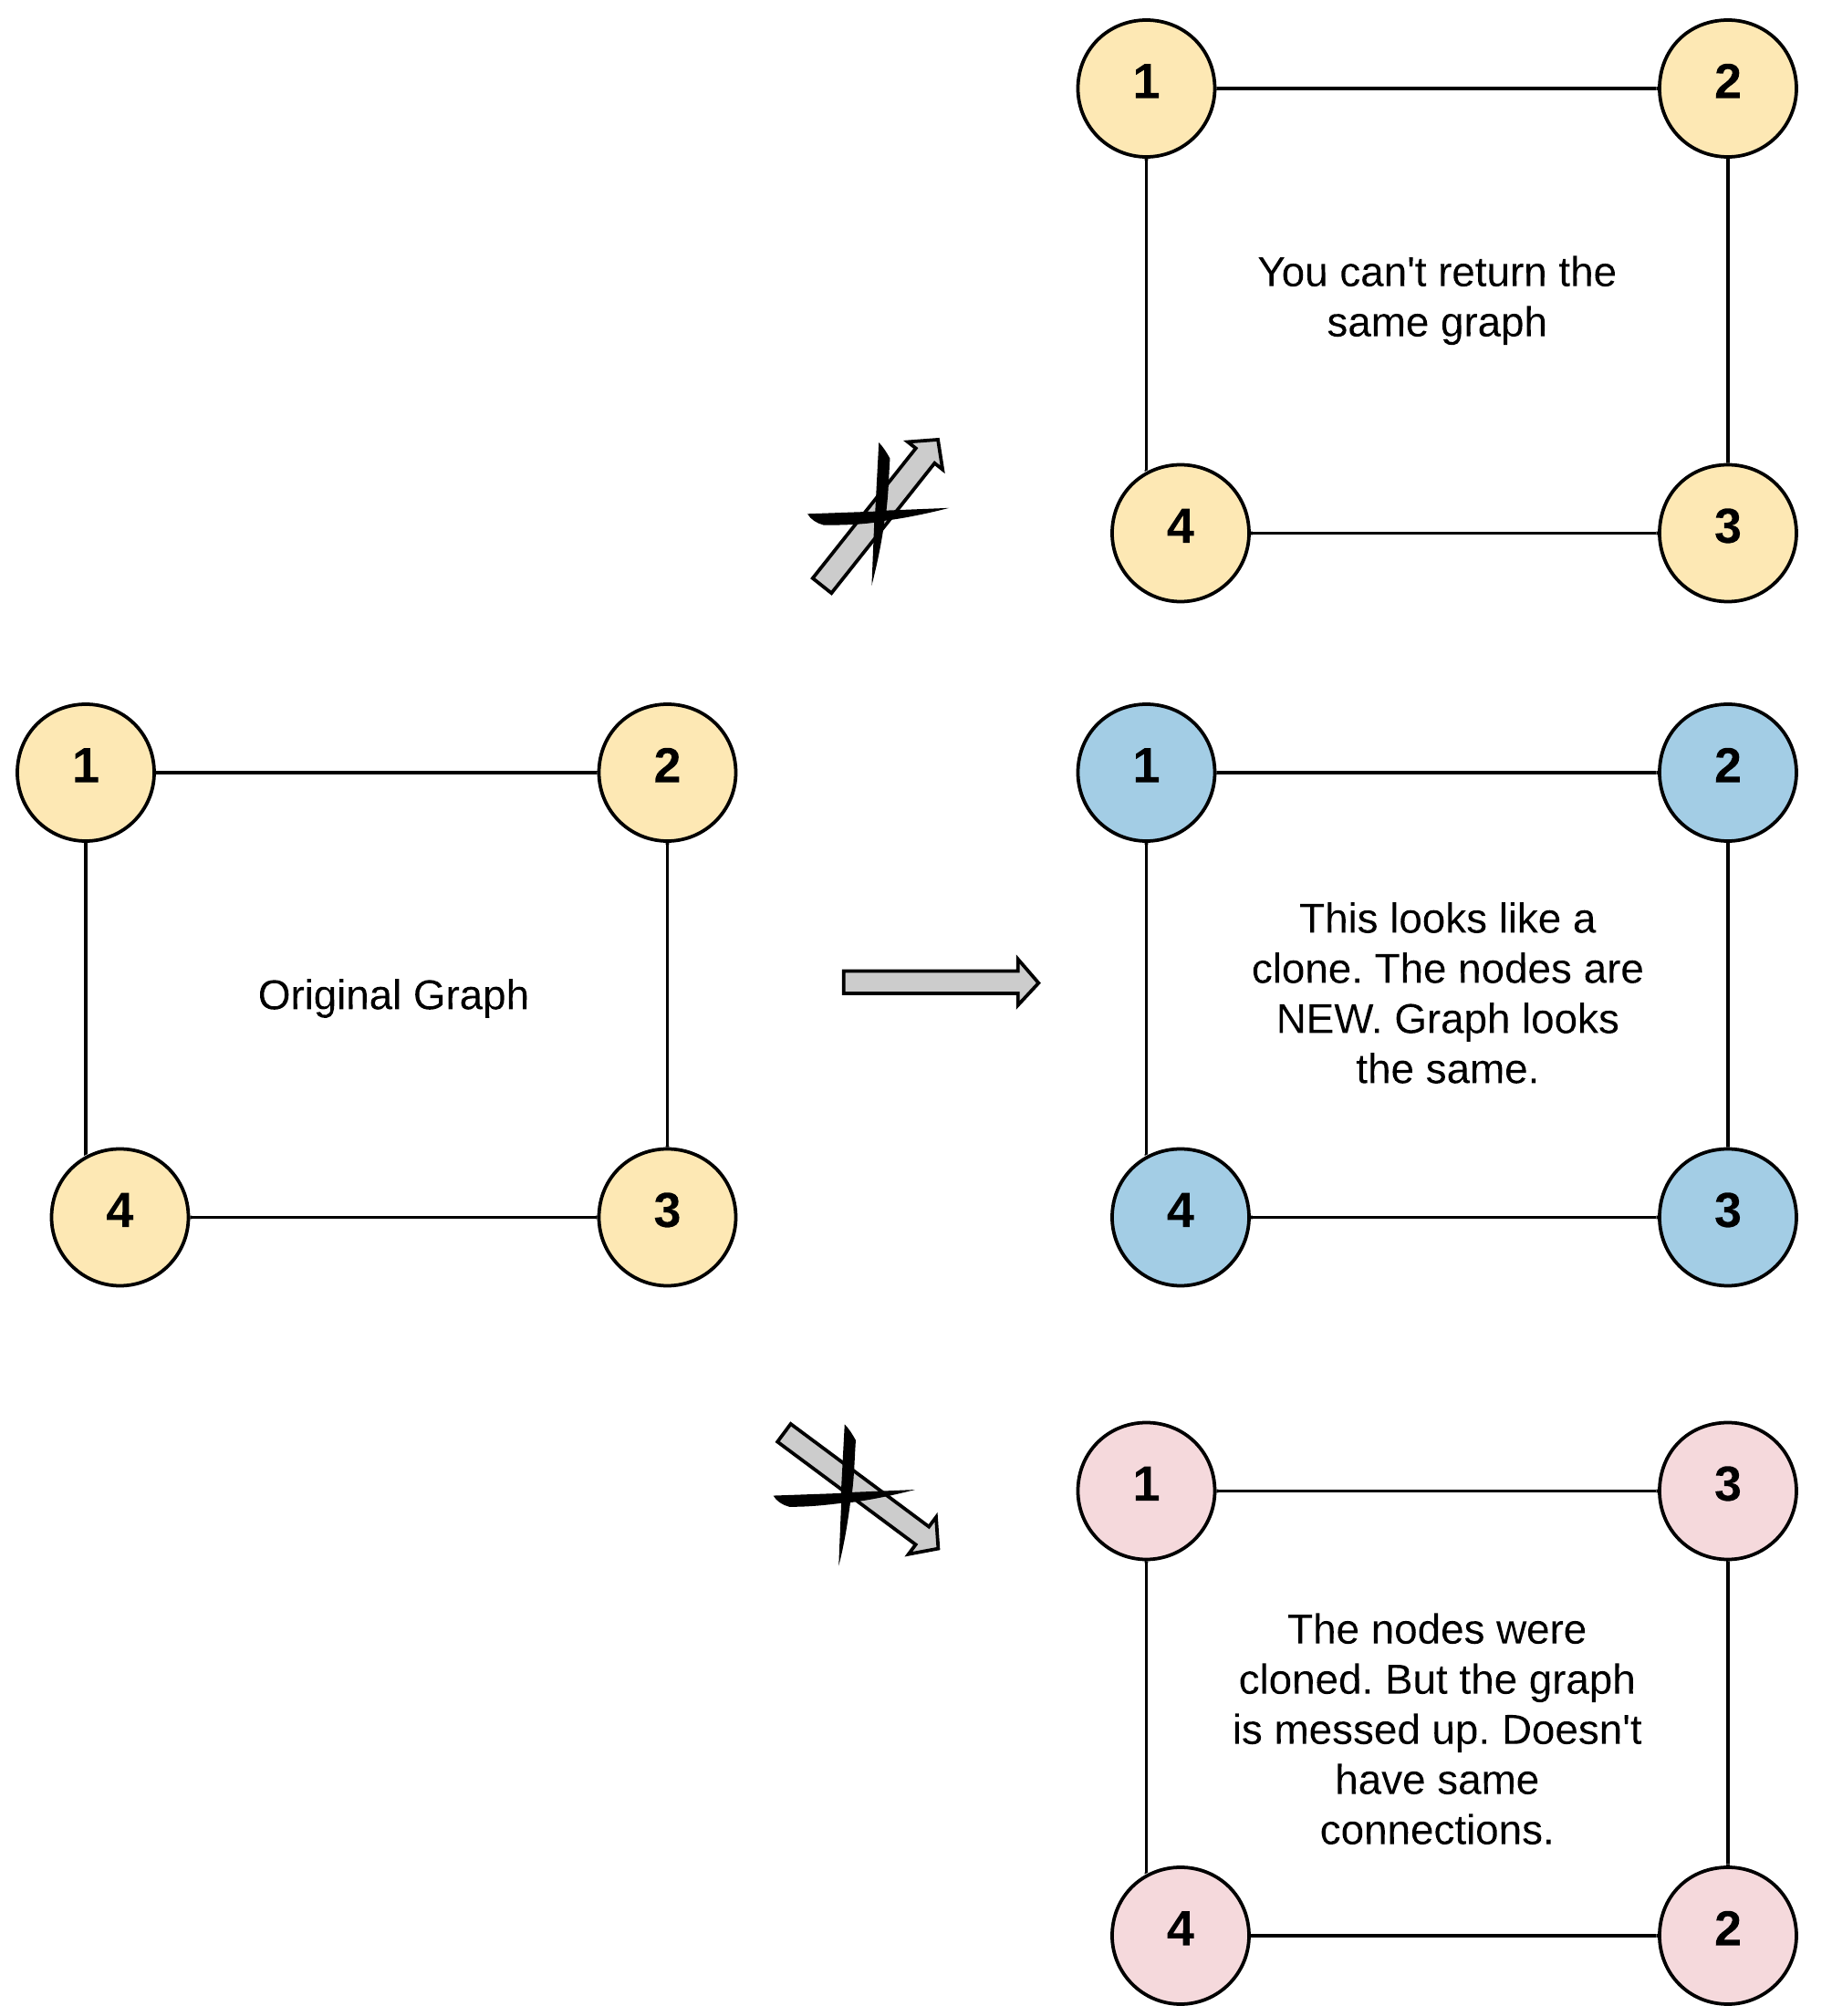


Input: adjList = [[2,4],[1,3],[2,4],[1,3]]

Output: [[2,4],[1,3],[2,4],[1,3]]

Explanation: There are 4 nodes in the graph.

1st node (val = 1)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
2nd node (val = 2)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).
3rd node (val = 3)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).
4th node (val = 4)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).

Example 2:

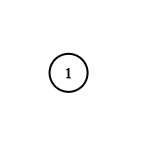


Input: adjList = [[]]

Output: [[]]

Explanation: Note that the input contains one empty list. The graph consists of only one node with val = 1 and it does not have any neighbors.

Example 3:

Input: adjList = []

Output: []

Explanation: This an empty graph, it does not have any nodes.


Constraints:

The number of nodes in the graph is in the range [0, 100].
1 <= Node.val <= 100
Node.val is unique for each node.
There are no repeated edges and no self-loops in the graph.
The Graph is connected and all nodes can be visited starting from the given node.

In [ ]:
class Node:
  def __init__(self, val = 0, neighbors = None):
    self.val = val
    self.neighbors = neighbors if neighbors is not None else []

class Solution:
  def CloneGraph(self, node: Node) -> Node:
    oldToNew = {}

    def dfs(node):
      if node in oldToNew:
        return oldToNew[node]

      copy = Node(node.val)
      oldToNew[node] = copy
      for nei in node.neighbors:
        copy.neighbors.append(dfs(nei))
      return copy

    return dfs(node) if node else None

***2. Course Schedule***

prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return true if you can finish all courses. Otherwise, return false.



Example 1:

Input: numCourses = 2, prerequisites = [[1,0]]

Output: true

Explanation: There are a total of 2 courses to take.
To take course 1 you should have finished course 0. So it is possible.

Example 2:

Input: numCourses = 2, prerequisites = [[1,0],[0,1]]

Output: false

Explanation: There are a total of 2 courses to take.
To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.


Constraints:

1 <= numCourses <= 2000
0 <= prerequisites.length <= 5000
prerequisites[i].length == 2
0 <= ai, bi < numCourses
All the pairs prerequisites[i] are unique.

In [ ]:
from typing import List

class Solution:
  def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
    # map each course to prereq list
    preMap = { i:[] for i in range(numCourses)}
    for crs, pre in prerequisites:
      preMap[crs].append(pre)

    # visitSet = all courses along the curr DFS path
    visitSet = set()

    def dfs(crs):
      if crs in visitSet: # loop detected
        return False
      if preMap[crs] == []:
        return True

      visitSet.add(crs)
      for pre in preMap[crs]:
        if not dfs(pre):
          return False
      visitSet.remove(crs)
      preMap[crs] = []
      return True

    for crs in range(numCourses):
      if not dfs(crs):
        return False
    return True

***3. Pacific Atlantic Water Flow***

There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.



Example 1:

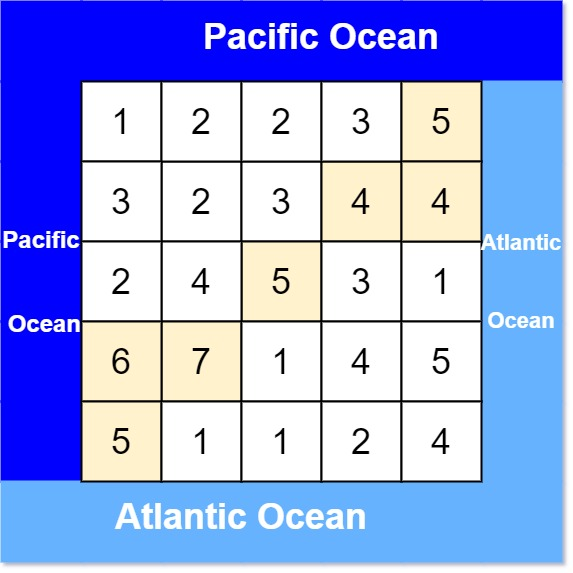

Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]

Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]

Explanation: The following cells can flow to the Pacific and Atlantic oceans, as shown below:
[0,4]: [0,4] -> Pacific Ocean
       [0,4] -> Atlantic Ocean
[1,3]: [1,3] -> [0,3] -> Pacific Ocean
       [1,3] -> [1,4] -> Atlantic Ocean
[1,4]: [1,4] -> [1,3] -> [0,3] -> Pacific Ocean
       [1,4] -> Atlantic Ocean
[2,2]: [2,2] -> [1,2] -> [0,2] -> Pacific Ocean
       [2,2] -> [2,3] -> [2,4] -> Atlantic Ocean
[3,0]: [3,0] -> Pacific Ocean
       [3,0] -> [4,0] -> Atlantic Ocean
[3,1]: [3,1] -> [3,0] -> Pacific Ocean
       [3,1] -> [4,1] -> Atlantic Ocean
[4,0]: [4,0] -> Pacific Ocean
       [4,0] -> Atlantic Ocean
Note that there are other possible paths for these cells to flow to the Pacific and Atlantic oceans.

Example 2:

Input: heights = [[1]]

Output: [[0,0]]

Explanation: The water can flow from the only cell to the Pacific and Atlantic oceans.


Constraints:

m == heights.length
n == heights[r].length
1 <= m, n <= 200
0 <= heights[r][c] <= 105

In [ ]:
from typing import List

class Solution:
  def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
    ROWS, COLS = len(heights), len(heights[0])
    pac, atl = set(), set()

    def dfs(r, c, visit, prevHeight):
      if ((r, c) in visit or
          r < 0 or c < 0 or r == ROWS or c == COLS or
          heights[r][c] < prevHeight):
        return

      visit.add((r, c))
      dfs(r + 1, c, visit, heights[r][c])
      dfs(r - 1, c, visit, heights[r][c])
      dfs(r, c + 1, visit, heights[r][c])
      dfs(r, c - 1, visit, heights[r][c])

    for c in range(COLS): # every position in row
      dfs(0, c, pac, heights[0][c]) # 1st row
      dfs(ROWS - 1, c, atl, heights[ROWS - 1][c]) # last row

    for r in range(ROWS): # every position in col
      dfs(r, 0, pac, heights[r][0]) # 1st col
      dfs(r, COLS - 1, atl, heights[r][COLS - 1]) # last col

    res = []
    for r in range(ROWS):
      for c in range(COLS):
        if (r, c) in pac and (r, c) in atl:
          res.append([r, c])
    return res

***4. Number of Connected Components in an Undirected Graph***

You have a graph of n nodes. You are given an integer n and an array edges where edges[i] = [ai, bi] indicates that there is an edge between ai and bi in the graph.

Return the number of connected components in the graph.


Example 1:

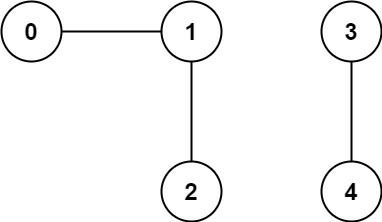

Input: n = 5, edges = [[0,1],[1,2],[3,4]]

Output: 2

Example 2:

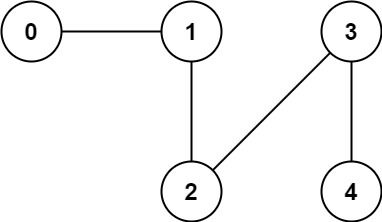

Input: n = 5, edges = [[0,1],[1,2],[2,3],[3,4]]

Output: 1


Constraints:

1 <= n <= 2000
1 <= edges.length <= 5000
edges[i].length == 2
0 <= ai <= bi < n
ai != bi
There are no repeated edges.

In [ ]:
# Union Find
from typing import List

class Solution:
  def countComponents(self, n: int, edges: List[List[int]]) -> int:
    par = [i for i in range(n)]
    rank = [1] * n

    def find(n1):
      res = n1

      while res != par[res]:
        par[res] = par[par[res]]
        res = par[res]
      return res

    def union(n1, n2):
      p1, p2 = find(n1), find(n2)

      if p1 == p2:
        return 0

      if rank[p2] > rank[p1]:
        par[p1] = p2
        rank[p2] += rank[p1]
      else:
        par[p2] = p1
        rank[p1] += rank[p2]
      return 1

    res = n
    for n1, n2 in edges:
      res -= union(n1, n2)
    return res

***5. Longest Consecutive Sequence***

Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.

You must write an algorithm that runs in O(n) time.



Example 1:

Input: nums = [100,4,200,1,3,2]

Output: 4

Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4.

Example 2:

Input: nums = [0,3,7,2,5,8,4,6,0,1]

Output: 9


Constraints:

0 <= nums.length <= 105
-109 <= nums[i] <= 109

In [ ]:
from typing import List

class Solution:
  def longestConsecutive(self, nums: List[int]) -> int:
    numSet = set(nums)
    longest = 0

    for n in nums:
      # Check if it is the start of the sequence
      if (n - 1) not in numSet:
        length = 0
        while (n + length) in numSet:
          length += 1
        longest = max(length, longest)
    return longest

***6. Alien Dictionary***

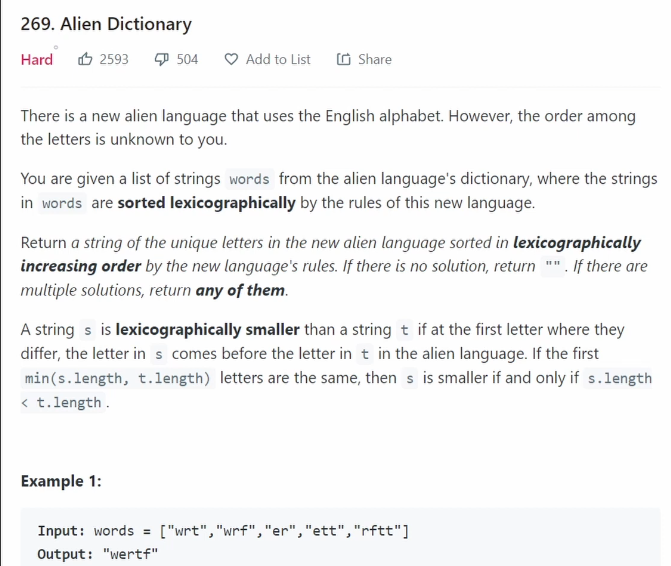

In [ ]:
# Topological Sort
from typing import List

class Solution:
  def alienOrder(self, words: List[str]) -> str:
    adj = {c:set() for w in words for c in w}

    for i in range(len(words) - 1):
      w1, w2 = words[i], words[i + 1]
      minLen = min(len(w1), len(w2))
      if len(w1) > len(w2) and w1[:minLen] == w2[:minLen]:
        return ""
      for j in range(minLen):
        if w1[j] != w2[j]:
          adj[w1[j]].add(w2[j])
          break

      visit = {} # False=visited, True=current path
      res = []

      def dfs(c):
        if c in visit:
          return visit[c]

        visit[c] = True
        for nei in adj[c]:
          if dfs(nei):
            return True
        visit[c] = False
        res.append(c)

      for c in adj:
        if dfs(c):
          return ""

      res.reverse()
      return "".join(res)

***7. Graph Valid Tree***

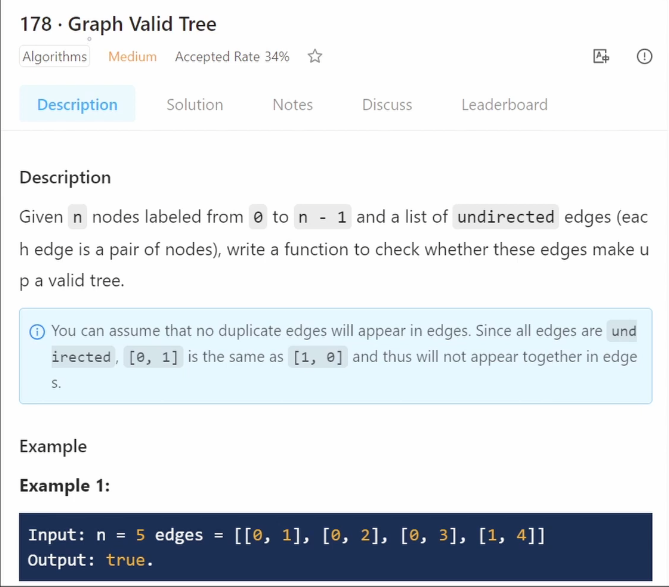

In [ ]:
class Solution:
  def validTree(self, n, edges):
    if not n:
      return True

    adj = { i:[] for i in range(n) }
    for n1, n2 in edges:
      adj[n1].append(n2)
      adj[n2].append(n1)

    visit = set()

    def dfs(i, prev):
      if i in visit: # loop detected
        return False

      visit.add(i)
      for j in adj[i]: # visiting the neighbors
        if j == prev: # to keep track prev node to prevent false loop detection
          continue
        if not dfs(j, i):
          return False
      return True

    return dfs(0, -1) and n == len(visit)

***8. Number of Islands***

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.



Example 1:

Input: grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]

Output: 1

Example 2:

Input: grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

Output: 3


Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 300
grid[i][j] is '0' or '1'.

In [ ]:
class Solution:
  def numOfIsland(self, grid):
    if not grid:
      return 0

    rows, cols = len(grid), len(grid[0])
    visit = set()
    islands = 0

    def bfs(r, c):
      q = collections.deque()
      visit.add((r, c))
      q.append((r, c))
      while q:
        row, col = q.popleft() # *** if pop() here, it's iterative DFS
        directions = [[1, 0], [-1, 0], [0, 1], [0, -1]] # down, up, right, left
        for dr, dc in directions:
          r, c = row + dr, col + dc
          if (r in range(rows) and
              c in range(cols) and
              grid[r][c] == "1" and
              (r, c) not in visit):
              q. append(r, c)
              visit.add(r, c)

    for r in range(rows):
      for c in range(cols):
        if grid[r][c] == "1" and (r, c) not in visit:
          bfs(r, c)
          islands += 1

    return islands